In [20]:
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns
%matplotlib inline
import numpy as np # for computations
import pandas as pd # for manipulating data
import scipy.stats as sci

After importing the necessary tools, let's learn how to work with the data first. Yes, I'm sure you all want to get right to the trading and making the $$$$, but EDA (exploratory data analysis) is necessary to build a well-functioning algo.

Here's a link to a quick overview of EDA (https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python).

In [21]:
# If you haven't gone through the steps to install the quantiacs toolbox, please look here first (https://www.quantiacs.com/For-Quants/GetStarted.aspx)

# All of the data quantiacs provides is included. Let's take a look at one data set first. The ES aka E-mini S&P 500 Index futures.
# The data is within the "tickerData" folder. Find where it is in your file directory.
F_ES = pd.read_csv('C:/FuturesTickerData/F_ES.txt', parse_dates=['DATE'])
# F_ES = pd.read_csv('.../tickerData/F_ES.txt')
F_ES.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO
7106,2018-03-12,139437.5,140262.5,139187.5,139450.0,1644022,1166354,0,0,237.5
7107,2018-03-13,139350.0,140362.5,138125.0,138637.5,2226645,1857383,0,0,0.0
7108,2018-03-14,138350.0,139175.0,137412.5,137695.0,1905137,2385499,0,0,0.0
7109,2018-03-15,137737.5,138362.5,137250.0,137925.0,1370921,2609150,0,0,0.0
7110,2018-03-16,137875.0,138312.5,137512.5,137775.0,1102984,2665457,0,0,0.0


In [22]:
F_ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 10 columns):
DATE      7111 non-null datetime64[ns]
 OPEN     7111 non-null float64
 HIGH     7111 non-null float64
 LOW      7111 non-null float64
 CLOSE    7111 non-null float64
 VOL      7111 non-null int64
 OI       7111 non-null int64
 P        7111 non-null int64
 R        7111 non-null int64
 RINFO    7111 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 555.6 KB


In [23]:
F_ES.describe()
# parameter details --> 
# http://quantiacs-python-toolbox-documentation.readthedocs.io/en/latest/ts_structure.html#arguments-parameters

,OPEN,HIGH,LOW,CLOSE,VOL,OI,P,R,RINFO
count,7111.000000,7111.000000,7111.000000,7111.000000,7.111000e+03,7.111000e+03,7111.000000,7111.000000,7111.000000
mean,58362.529602,58768.173464,57933.574603,58379.958374,9.157235e+05,1.174028e+06,3184.491492,3184.491492,1.849248
std,27840.119454,27977.427908,27703.939599,27856.096161,1.006158e+06,1.195672e+06,25062.363777,25062.363777,49.711177
min,14885.000000,15210.000000,14780.000000,14867.500000,1.006000e+03,1.040000e+02,0.000000,0.000000,-450.000000
25%,37595.000000,37990.000000,37318.750000,37702.500000,6.338400e+04,1.409080e+05,0.000000,0.000000,0.000000
50%,58137.500000,58650.000000,57575.000000,58125.000000,6.095270e+05,4.639860e+05,0.000000,0.000000,0.000000
75%,71093.750000,71556.250000,70487.500000,71075.000000,1.584350e+06,2.594005e+06,0.000000,0.000000,0.000000
max,143712.500000,143925.000000,142575.000000,143737.500000,6.926660e+06,3.594453e+06,201806.000000,201806.000000,1150.000000


In [24]:
# Double check that there are no NAN values.
F_ES.isnull().sum()
# There should not be any. YAY!

DATE      0
 OPEN     0
 HIGH     0
 LOW      0
 CLOSE    0
 VOL      0
 OI       0
 P        0
 R        0
 RINFO    0
dtype: int64

# Visualization

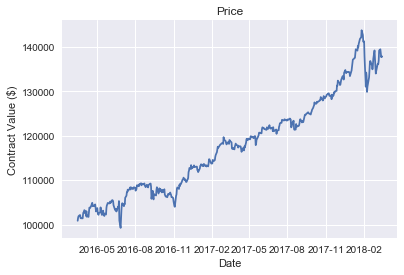

In [25]:
# Let's plot a simple chart of the close price over the last 2 years (*note: avg of 252 trading days per year)
x = F_ES['DATE'].iloc[(-252*2):]
y = F_ES[' CLOSE'].iloc[(-252*2):]

fig = plt.figure(1)
ax1 = fig.add_subplot(111) # adjusts location of plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Contract Value ($)')
ax1.set_title('Price')
ax1.plot(x,y)

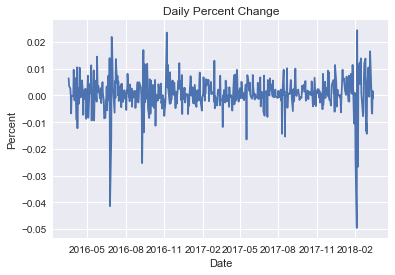

In [26]:
# Daily price change statistics
close_pct_chg = y.pct_change()

plt.figure()
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Daily Percent Change')
plt.plot(x, close_pct_chg)
plt.show()

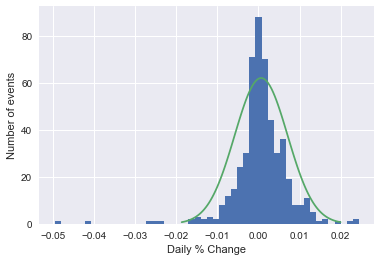

In [27]:
# Histogram overlayed with a normal distribution
sns.set()
dates_2yrs = x[1:]
close_pct_chg = close_pct_chg.dropna()

_ = plt.hist(close_pct_chg, bins=50)
_ = plt.xlabel('Daily % Change')
_ = plt.ylabel('Number of events')

import matplotlib.mlab as mlab

mean = np.mean(close_pct_chg)
std = np.std(close_pct_chg)

mu, sigma = mean, std
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.show()

# Source: https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution

In [28]:
print 'kurtosis: ' + str(sci.kurtosis(close_pct_chg))
print 'skew: ' + str(sci.skew(close_pct_chg))
print '-------------------------------------'
print sci.kurtosistest(close_pct_chg)
print sci.describe(close_pct_chg)

x = np.random.normal(mean, std, 504)
print sci.describe(x)


kurtosis: 12.1854970608
skew: -1.54306578061
-------------------------------------
KurtosistestResult(statistic=10.554508526798964, pvalue=4.841666813925956e-26)
DescribeResult(nobs=503L, minmax=(-0.04959651827001543, 0.02442282007250518), mean=0.0006410460102019155, variance=4.1534441365244915e-05, skewness=-1.543065780605483, kurtosis=12.185497060822952)
DescribeResult(nobs=504L, minmax=(-0.020519451728253996, 0.018668361524798886), mean=0.0009505798197839413, variance=3.5891932348867326e-05, skewness=-0.05020606392460744, kurtosis=0.19250047517503743)


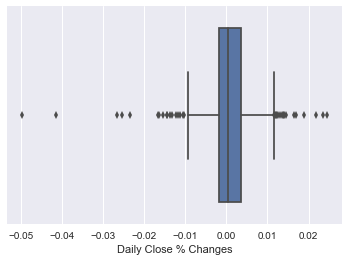

mean: 0.000641046010202
std: 0.00643831250586
var: 4.14518679232e-05


In [29]:
# Summary statistics & boxplot
_ = sns.boxplot(close_pct_chg)
_ = plt.xlabel('Daily Close % Changes')
plt.show()

print "mean: " + str(np.mean(close_pct_chg))
print "std: " + str(np.std(close_pct_chg))
print "var: " + str(np.var(close_pct_chg))

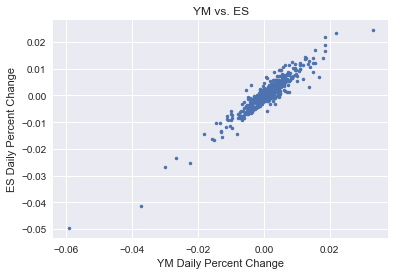

In [30]:
# Let's do some analysis on two contracts YM and ES
F_YM = pd.read_csv('C:/FuturesTickerData/F_YM.txt', parse_dates=['DATE'])

F_YM_2yrs = F_YM[' CLOSE'].iloc[(-252*2):].pct_change().dropna()
F_ES_2yrs = F_ES[' CLOSE'].iloc[(-252*2):].pct_change().dropna()

_ = plt.plot(F_YM_2yrs, F_ES_2yrs, marker='.', linestyle='none')
_ = plt.xlabel('YM Daily Percent Change')
_ = plt.ylabel('ES Daily Percent Change')
_ = plt.title('YM vs. ES')
plt.show()

In [31]:
print np.corrcoef(F_YM_2yrs, F_ES_2yrs)

[[1.        0.9442674]
 [0.9442674 1.       ]]


In [32]:
# https://docs.scipy.org/doc/scipy-0.7.x/reference/stats.html

In [33]:
up_ES_2yrs = 0
down_ES_2yrs = 0
for num in F_ES_2yrs:
    if num >= 0:
        up_ES_2yrs +=1
    else:
        down_ES_2yrs +=1
#plt.plot(F_ES_2yrs, cumulative=True, normed=True)

In [34]:
print up_ES_2yrs
print down_ES_2yrs
print type(up_ES_2yrs)

285
218
<type 'int'>


Text(0,0.5,u'# of days')

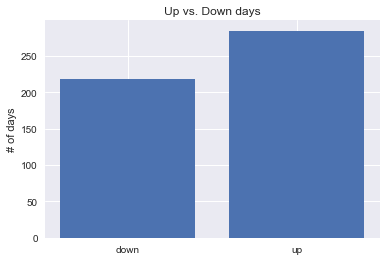

In [35]:
plt.bar(['up', 'down'], [up_ES_2yrs,down_ES_2yrs])
plt.title('Up vs. Down days')
plt.ylabel('# of days')
#plt.bar(up_down_ES_2yrs)